In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
df.shape

(209593, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
#We can notice that there is an extra column named--> Unnamed: 0 which appears to be an index column,
#it would be of no use hence dropping it.

df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
#we can observe that almost all columns are of either integer or float type,very few are of object type
#storing object type columns into a separate dataframe

objecttypes=df.select_dtypes(include=['object'])
objecttypes

,msisdn,pcircle,pdate
0,21408I70789,UPW,2016-07-20
1,76462I70374,UPW,2016-08-10
2,17943I70372,UPW,2016-08-19
3,55773I70781,UPW,2016-06-06
4,03813I82730,UPW,2016-06-22
...,...,...,...
209588,22758I85348,UPW,2016-06-17
209589,95583I84455,UPW,2016-06-12
209590,28556I85350,UPW,2016-07-29
209591,59712I82733,UPW,2016-07-25


OBSERVATION:

1) The msisdn has numeric entries,so converting this column into integer type.

2)Checking the Pcircle entries ,seems all the rows has same telecom provider name.
 If all the entries are same in pcircle column, will be deleting the column.

3)Will be converting the pdate column into like year ,month and date.

In [8]:
for col in objecttypes.columns:
    print("Number of unique value in ",col,"==>",objecttypes[col].nunique())
    print("\n",col,"\n",objecttypes[col].value_counts())
    print("**********************************************")

Number of unique value in  msisdn ==> 186243

 msisdn 
 04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64
**********************************************
Number of unique value in  pcircle ==> 1

 pcircle 
 UPW    209593
Name: pcircle, dtype: int64
**********************************************
Number of unique value in  pdate ==> 82

 pdate 
 2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64
**********************************************


OBSERVATION:

1)msisdn happens to be cellphone number,but there is I in the 6th place.Usually a mobile number consists of 10 digits.
   by including I it will be 11 digits.so deleting I.

2)Deleting pcircle column as it has single value.

3)We can notice the data belong to  year-2016 ,will be adding the month and date columns.

In [9]:
df.drop(['pcircle'],axis=1,inplace=True)

In [10]:
len(df['msisdn'][0])

11

In [11]:
df['msisdn']=df['msisdn'].str.replace('I','')
df['msisdn']

0         2140870789
1         7646270374
2         1794370372
3         5577370781
4         0381382730
             ...    
209588    2275885348
209589    9558384455
209590    2855685350
209591    5971282733
209592    6506185339
Name: msisdn, Length: 209593, dtype: object

In [12]:
df['msisdn']=df['msisdn'].astype('int64')

In [13]:
df['Year']=df['pdate'].str.split('-').str[0]
df['Month']=df['pdate'].str.split('-').str[1]
df['Date']=df['pdate'].str.split('-').str[2]

In [14]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Year,Month,Date
0,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,2016,07,20
1,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,2016,08,10
2,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,2016,08,19
3,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,2016,06,06
4,1,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,2016,06,22


In [15]:
#since we have splitted the pdate column,into 3 columns,dropping pdate column
df.drop(['pdate'],axis=1,inplace=True)

In [16]:
#checking the unique values in year column.
df['Year'].nunique()

1

In [17]:
#since all the data collected is about 2016 year,dropping the year column as weel
df.drop(['Year'],axis=1,inplace=True)

In [19]:
df['Month']=df['Month'].astype(int)
df['Date']=df['Date'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int64  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [21]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
count,209593.000000,2.095930e+05,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,4.974956e+09,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,2.890571e+09,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,4.827380e+05,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,2.465991e+09,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,4.905684e+09,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,7.503370e+09,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,9.999895e+09,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


COLUMNS WITH NEGATIVE MINIMUM VALUES:

1)aon

2)daily_decr30=>Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

3)daily_decr90=>Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

4)rental30=>Average main account balance over last 30 days

5)rental90=>Average main account balance over last 90 days

6)last_rech_date_ma=>Number of days till last recharge of main account

7)last_rech_date_da=>Number of days till last recharge of data account

aon

=>indicates Age On Cellular Network in days.

=>minimum value is -48,usually minimum value shoud be zero.

so checking the other columns values where aon has negative values.

In [22]:
df_aon=df[df['aon']<0]
df_aon

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
30,1,7013090843,-42.0,8.864333,8.864333,780.71,780.71,780195.497093,0.0,773,...,6.0,1.0,1.000000,6,6,1.0,0.0,0.0,6,7
197,1,4685890841,-36.0,32.075333,32.075333,1557.53,1557.53,1.000000,0.0,1539,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,13
322,1,302770379,-37.0,9.160000,9.160000,203.04,203.04,1.000000,0.0,770,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,12
504,1,7567084458,-36.0,11.470333,11.470333,40.04,40.04,1.000000,0.0,770,...,6.0,0.0,3565.786503,6,6,0.0,0.0,0.0,6,13
603,1,5849589235,-35.0,12.474000,12.474000,1823.08,1823.08,1.000000,0.0,1539,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208716,1,1016290589,-34.0,19.260000,19.260000,714.15,714.15,1.000000,0.0,773,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,15
209121,1,6551184450,-18.0,700.580000,700.600000,1057.72,1090.76,1.000000,0.0,770,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,7,1
209240,1,3489670375,-28.0,10.640000,10.640000,133.35,133.35,1.000000,0.0,770,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,21
209421,1,5171784459,-44.0,7.166667,7.166667,368.55,368.55,1.000000,0.0,773,...,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,5


In [23]:
df_aon['label'].value_counts()

1    1047
0     492
Name: label, dtype: int64

Observation:

notice that there are both success and failure in payment of loans.Hence assumingthe minus sign might be typo.

converting the aon column to positive.

In [24]:
df['aon']=abs(df['aon'])

In [25]:
#checking for minimum value.
df['aon'].min()

1.0

In [26]:
#no.of days till last recharge of main and data accounts cant be negative.
#converting them into positive values.
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

In [27]:
df['last_rech_date_ma'].min()

0.0

In [28]:
df['last_rech_date_da'].min()

0.0

In [29]:
#creating a dataframe which has negative values in rental30 column
df_ren30=df[df['rental30']<0]
df_ren30

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
24,0,5964582735,966.0,291.563333,291.563333,-2020.09,-2020.09,0.000000,0.0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,6,23
41,1,8558070784,545.0,113.750000,113.750000,-110.75,-110.75,6.000000,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,12.0,12.0,6,25
77,1,9838870377,383.0,1219.782000,1238.740000,-889.14,-919.80,22.000000,0.0,3178,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,7,1
116,1,7336570375,157.0,63.720000,63.720000,-177.48,-177.48,0.000000,0.0,0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,6,18
117,1,4189484454,1140.0,23.833333,23.833333,-40.20,-40.20,6.000000,0.0,1547,...,6.0,0.0,2.0,12,6,0.0,5.0,5.0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209304,1,6444290584,410.0,176.045333,176.045333,-281.12,-281.12,18.000000,0.0,10000,...,6.0,0.0,3.0,18,6,0.0,2.0,2.0,6,28
209332,1,2736185329,1652.0,5062.936000,5194.680000,-101.16,-505.80,32.000000,0.0,8000,...,6.0,0.0,4.0,24,6,0.0,0.0,2.0,7,24
209441,1,6562282739,918.0,444.209333,444.209333,-691.90,-691.90,1.000000,0.0,8000,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,6,22
209466,1,5952588698,190.0,2601.750000,2622.100000,-334.62,-441.57,767980.563105,0.0,1539,...,12.0,0.0,3.0,24,12,0.0,6.0,6.0,7,5


Creating two different dataframes:
1)one being the people who failed to repay the loan. 
2)Other being the people who did repay the loan these two dataframes are created in respect to negative values in rental 30 column.

In [30]:
#dataframe who failed to pay loan with respect to average rental balance of 30 days
df_renFail=df_ren30[df_ren30['label']==0]
df_renFail[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
24,0,-2020.09,6
246,0,-229.77,6
1469,0,-163.90,24
1777,0,-121.21,6
2681,0,-443.04,18
...,...,...,...
207113,0,-278.64,6
207949,0,-3719.25,6
208543,0,-187.00,6
209175,0,-1126.16,6


In [31]:
#dataframe who successfully pay loan with respect to average rental balance of 30 days
df_renPaid=df_ren30[df_ren30['label']==1]
df_renPaid[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
41,1,-110.75,12
77,1,-919.80,6
116,1,-177.48,12
117,1,-40.20,12
125,1,-44.88,24
...,...,...,...
209304,1,-281.12,18
209332,1,-505.80,24
209441,1,-691.90,6
209466,1,-441.57,24


OBSERVATION:

We can note that eventhough the average rental balance is in negatives[which means the customer owe rent to company],
they did repay their loans,which is most unlikely.

There might be other possibility that user will not be granted loan if they have negative balance.
This might be due to erroneous entry.So converting them to positive. 

In [32]:
df['rental30']=abs(df['rental30'])

In [33]:
#creating a dataframe which has negative values in rental90 column
df_ren90=df[df['rental90']<0]
df_ren90[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
24,0,-2020.09,6
41,1,-110.75,12
77,1,-919.80,6
116,1,-177.48,12
117,1,-40.20,12
...,...,...,...
209304,1,-281.12,18
209332,1,-505.80,24
209441,1,-691.90,6
209466,1,-441.57,24


In [34]:
#dataframe who failed to pay loan with respect to average rental balance of 90 days
df_ren90Fail=df_ren90[df_ren90['label']==0]
df_ren90Fail[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
24,0,-2020.09,6
246,0,-229.77,6
1309,0,-83.02,12
1469,0,-163.90,24
1777,0,-121.21,6
...,...,...,...
207113,0,-278.64,6
207949,0,-3719.25,6
208543,0,-187.00,6
209175,0,-1126.16,6


In [35]:
#dataframe who failed to pay loan with respect to average rental balance of 90 days
df_ren90Pass=df_ren90[df_ren90['label']==1]
df_ren90Pass[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
41,1,-110.75,12
77,1,-919.80,6
116,1,-177.48,12
117,1,-40.20,12
125,1,-44.88,24
...,...,...,...
209304,1,-281.12,18
209332,1,-505.80,24
209441,1,-691.90,6
209466,1,-441.57,24


In [36]:
#converting rental 90 column to positive.As there are negative values for people who had repaid their loans.
df['rental90']=abs(df['rental90'])

In [37]:
df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
17083.998141         1
62511.750702         1
                 ...  
30346.385852         1
66821.819056         1
55716.817238         1
41580.156627         1
96927.243252         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

maxamnt_loans30-> this column has to be either 6 or 12

we can notice that there are huge no.of entries other than 6,12. ignoring 0 because there might be users who hasnt taken loans.

Converting the other numbers to zero because there is no probability of loan repay amount other than 6 ad 12

there are 1047 rows that has values other than 6,12 and0.

In [38]:
len(df['maxamnt_loans30'])

209593

In [39]:
#checking the values which have entries other than 6,12,0
df.loc[(df['maxamnt_loans30']!=6.0) & (df['maxamnt_loans30']!=12.0) & (df['maxamnt_loans30']!=0.0),'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

In [40]:
#converting them to zero
df.loc[(df['maxamnt_loans30']!=6.0) & (df['maxamnt_loans30']!=12.0) & (df['maxamnt_loans30']!=0.0),'maxamnt_loans30']=0.0

In [41]:
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [42]:
#checking the users who havent taken any loan.
dff=pd.DataFrame(np.where(df['amnt_loans90']==0))
dff

,0,1,2,3,4,5,6,7,8,9,...,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042
0,127,149,187,212,262,431,441,475,488,570,...,208137,208148,208231,208818,209213,209337,209343,209401,209406,209580


OBSERVATION:

there are almmost 2043 rows in the main data frame where users have not taken any kind of loan.

Deleting those rows because they wont be of any use in prediction of loan repayment.

In [43]:
#deleting the info of users who havent taken any loan.
df.drop(df[df['amnt_loans90']==0].index,inplace=True)

In [44]:
np.where(df['amnt_loans90']==0)

(array([], dtype=int64),)

In [45]:
df.shape

(207550, 36)

In [46]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
count,207550.000000,2.075500e+05,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,...,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000
mean,0.873948,4.976519e+09,8095.625616,5352.424286,6044.967417,2697.321812,3477.845090,3744.568567,3719.710805,2057.044751,...,6.689790,0.054560,18.610723,23.878150,6.769116,0.046531,3.421201,4.350039,6.787560,14.429159
std,0.331908,2.891052e+09,75605.518933,9208.694592,10902.815812,4258.460653,5698.968928,53813.257533,53428.256336,2363.829442,...,2.107794,0.219043,225.235874,26.495145,2.005785,0.201625,8.796510,10.294639,0.737225,8.421331
min,0.000000,4.827380e+05,1.000000,-93.012667,-93.012667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,2.467696e+09,246.000000,41.760000,41.979500,299.690000,326.340000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,4.908380e+09,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.714286,7.000000,14.000000
75%,1.000000,7.506760e+09,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.800000,4.500000,7.000000,21.000000
max,1.000000,9.999895e+09,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,12.000000,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.000000


# EXPLORATORY DATA ANALYSIS

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [48]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'Month', 'Date'],
      dtype='object')

<AxesSubplot:xlabel='No.ofTimesDataAcntRechargedinlast30days', ylabel='Density'>

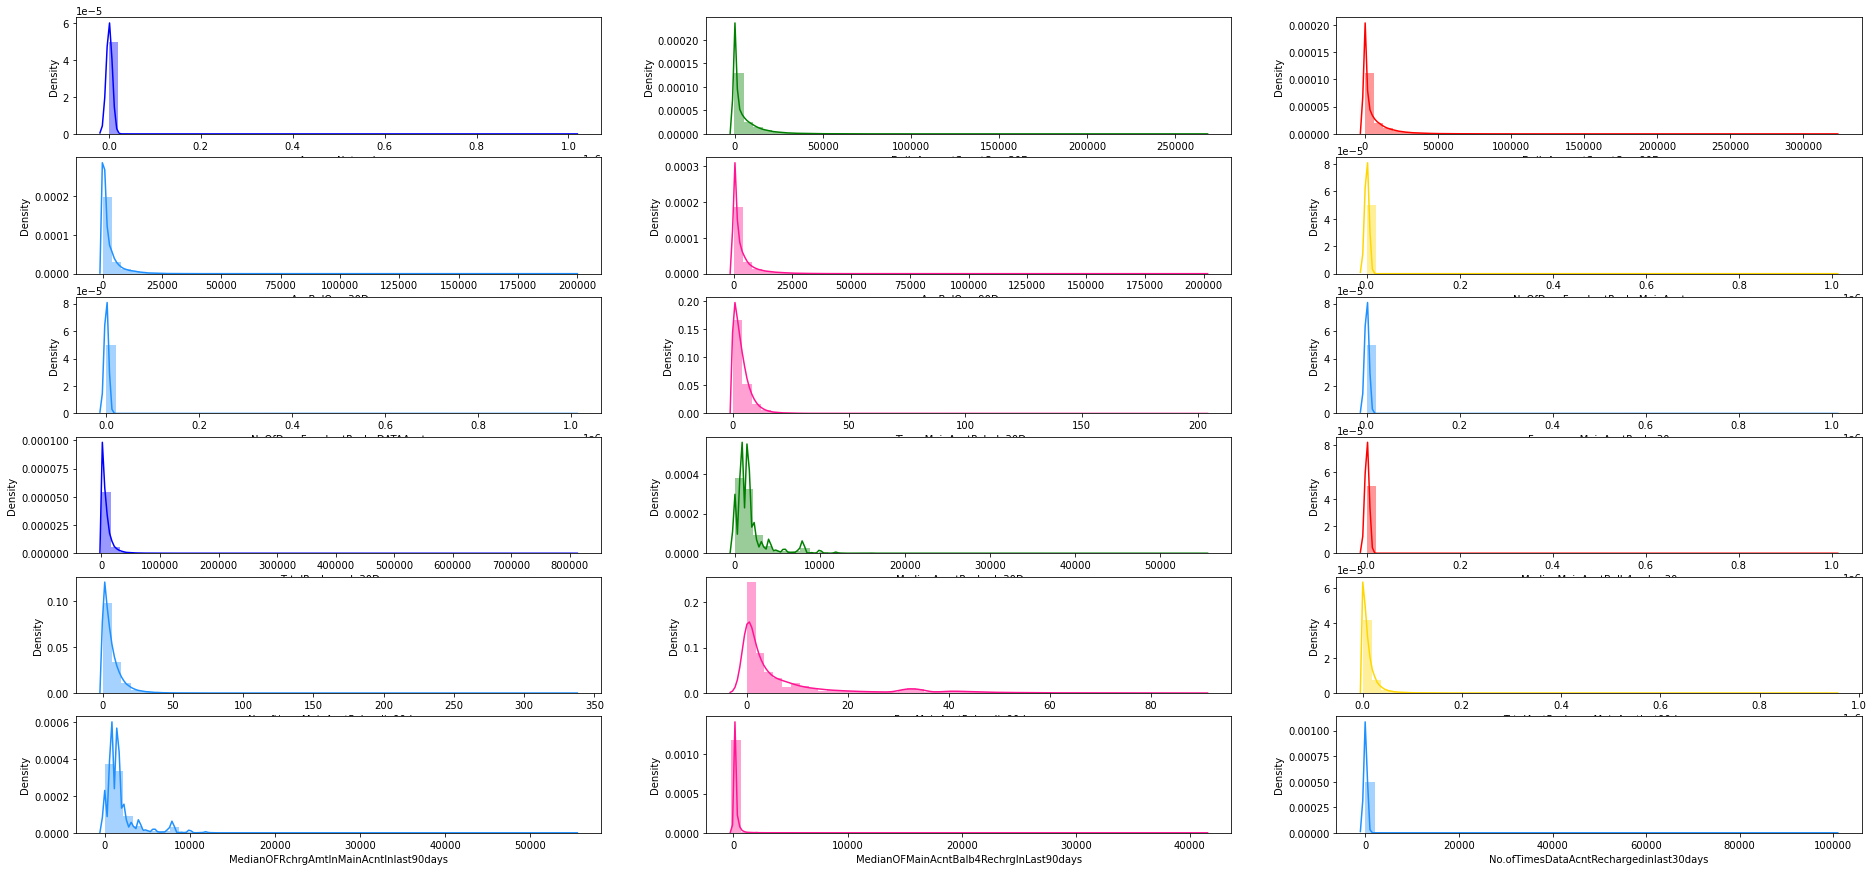

In [48]:
#checking distribution of columns
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15),(ax16,ax17,ax18))=plt.subplots(nrows=6,ncols=3,figsize=(32,15))

sns.distplot(df['aon'] , color="b",ax=ax1,axlabel='Age on Network')
sns.distplot(df['daily_decr30'] , color="g",ax=ax2,axlabel='DailyAmountSpentOver30Days')
sns.distplot(df['daily_decr90'] , color="r",ax=ax3,axlabel='DailyAmountSpentOver90Days')
sns.distplot(df['rental30'] , color="dodgerblue",ax=ax4,axlabel='AvgBalOver30Days')
sns.distplot(df['rental90'] , color="deeppink",ax=ax5,axlabel='AvgBalOver90Days')
sns.distplot(df['last_rech_date_ma'] , color="gold",ax=ax6,axlabel='NoOfDaysFromLastRechgMainAcnt')
sns.distplot(df['last_rech_date_da'] , color="dodgerblue",ax=ax7,axlabel='NoOfDaysFromLastRechgDATAAcnt')
sns.distplot(df['cnt_ma_rech30'] , color="deeppink",ax=ax8,axlabel='TimesMainAcntRchgIn30Days')
sns.distplot(df['fr_ma_rech30'] , color="dodgerblue",ax=ax9,axlabel='FrequencyMainAcntRechg30')
sns.distplot(df['sumamnt_ma_rech30'] , color="b",ax=ax10,axlabel='TotalRechargeIn30Days')
sns.distplot(df['medianamnt_ma_rech30'] , color="g",ax=ax11,axlabel='MedianAmntRechrgIn30Days')
sns.distplot(df['medianmarechprebal30'] , color="r",ax=ax12,axlabel='MedianMainAcntBalb4rechrg30')
sns.distplot(df['cnt_ma_rech90'] , color="dodgerblue",ax=ax13,axlabel='No.oftimesMainAcntRchrgdin90days')
sns.distplot(df['fr_ma_rech90'] , color="deeppink",ax=ax14,axlabel='FreqMainAcntRchrgdin90days')
sns.distplot(df['sumamnt_ma_rech90'] , color="gold",ax=ax15,axlabel='TotalAmtRechargeMainAcntlast90days')
sns.distplot(df['medianamnt_ma_rech90'] , color="dodgerblue",ax=ax16,axlabel='MedianOFRchrgAmtInMainAcntInlast90days')
sns.distplot(df['medianmarechprebal90'] , color="deeppink",ax=ax17,axlabel='MedianOFMainAcntBalb4RechrgInLast90days')
sns.distplot(df['cnt_da_rech30'] , color="dodgerblue",ax=ax18,axlabel='No.ofTimesDataAcntRechargedinlast30days')

<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

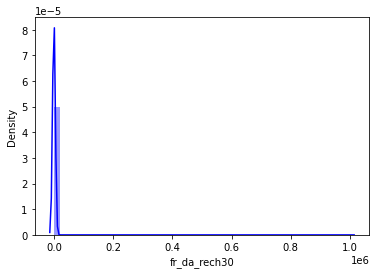

In [49]:
sns.distplot(df['fr_da_rech30'] , color="b",label='FrqncyOfDataAcntRchrgdIn30Days')

<AxesSubplot:xlabel='label', ylabel='count'>

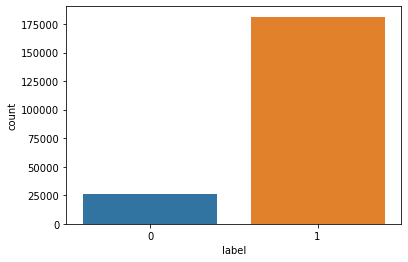

In [50]:
sns.countplot(df['label'])

OBSERVATION:

We can note that there is less data about defaulters and more about those who did repay their loan.

Hence can say that the data is imbalanced.

<AxesSubplot:xlabel='label', ylabel='aon'>

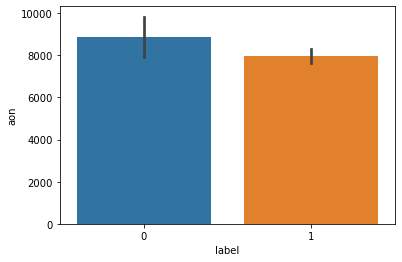

In [51]:
sns.barplot(x='label',y='aon',data=df)

OBSERVATION:

With increase in Age on Network,defaulting rate is higher.

Text(0.5, 1.0, 'Daily Amount Reduced from Balance Over 30 days')

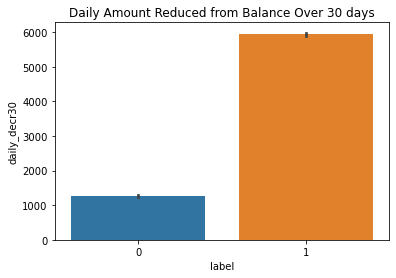

In [52]:
sns.barplot(x=df['label'],y=df['daily_decr30'])
plt.title('Daily Amount Reduced from Balance Over 30 days')

Text(0.5, 1.0, 'Average main account balance over last 30 days')

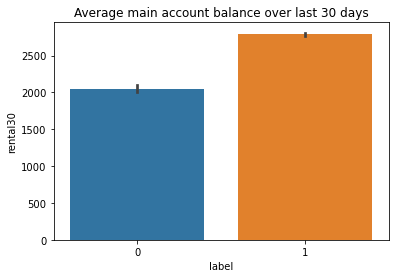

In [53]:
sns.barplot(x=df['label'],y=df['rental30'])
plt.title('Average main account balance over last 30 days')

OBSERVATION:

There is huge imbalance in the data collected, 
when compared to the imbalances,we can note that there is less difference between loan default and repayment.
Hence can say that with the increase in Average Main balance,there is a probability of defaulting.

Defaulters have  max average balance of 2000,repayers has an avg main balance over 2500

Text(0.5, 1.0, 'No.of times main account got recharged in last 30 days')

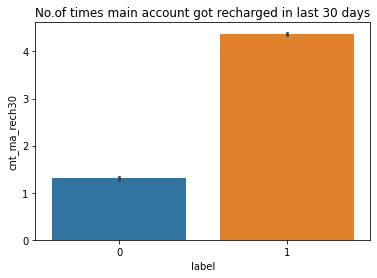

In [54]:
sns.barplot(x=df['label'],y=df['cnt_ma_rech30'])
plt.title('No.of times main account got recharged in last 30 days')

OBSERVATION:

Defaulters recharged Main account max number between 1 and 2 times.

whereas repayers recharged for 4 plus times.

Text(0.5, 1.0, 'Frequency of main account recharged in last 30 days')

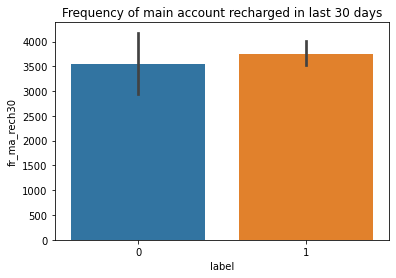

In [55]:
sns.barplot(x=df['label'],y=df['fr_ma_rech30'])
plt.title('Frequency of main account recharged in last 30 days')

OBSERVATION:

With increase in frequency of Recharge in last 30 days,equal probabilities of defaulting and repayment.
Even though there is less data about defaulting,there is high chance of defaulting with incresed recharge fdrequency.

Text(0.5, 1.0, 'Total amount of recharge in main account over last 30 days')

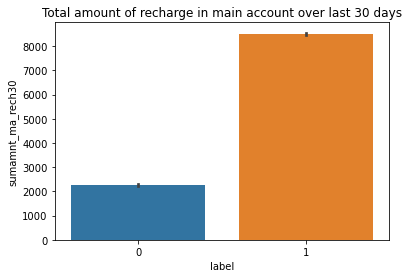

In [56]:
sns.barplot(x=df['label'],y=df['sumamnt_ma_rech30'])
plt.title('Total amount of recharge in main account over last 30 days')

OBSERVATION:

the defaulters has max limit ranging between 2000 and 3000 of Total recharge amount.

Text(0.5, 1.0, 'Median of recharge  done in main account over last 30 days')

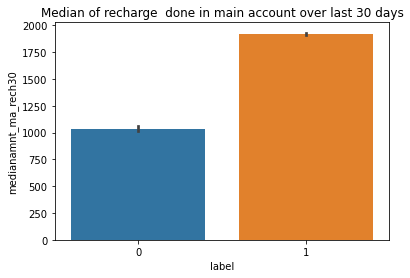

In [57]:
sns.barplot(x=df['label'],y=df['medianamnt_ma_rech30'])
plt.title('Median of recharge  done in main account over last 30 days')

OBSERVATION:

On an average the defaulters has recharged for a max of 1000 indonesian rupaiah.

Text(0.5, 1.0, 'Median of Main balance before recharge in last 30 days')

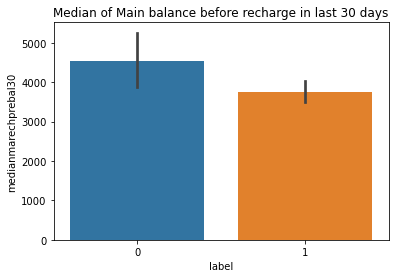

In [58]:
sns.barplot(x=df['label'],y=df['medianmarechprebal30'])
plt.title('Median of Main balance before recharge in last 30 days')

OBSERVATION:

1)Defaulters has a medianMain account recharge amount ranging between 4000 and 5000.

2)With increase in Median of Main balance recharge,probability of defaulting is very high.

Text(0.5, 1.0, 'No.of times data account got recharged in last 30 days')

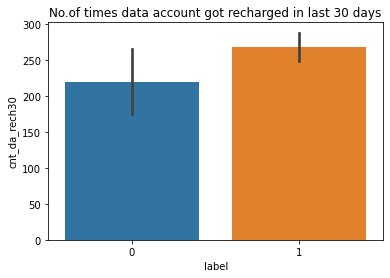

In [59]:
sns.barplot(x=df['label'],y=df['cnt_da_rech30'])
plt.title('No.of times data account got recharged in last 30 days')

OBSERVATION:

1)Defaulters has recharged the data account for a maximum of 200 to 250 times.

2)With increase in No.of times data accounts recharge,probability of defaulting is high.

Text(0.5, 1.0, 'Frequency of data account recharged in last 30 days')

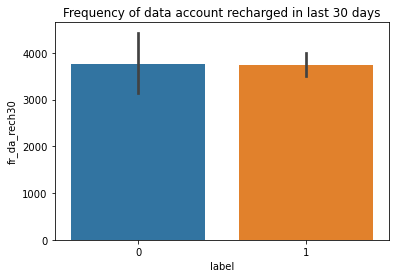

In [60]:
sns.barplot(x=df['label'],y=df['fr_da_rech30'])
plt.title('Frequency of data account recharged in last 30 days')

OBSERVATION:

with increase in frequency of recharging  data account,higher  chances of defulting.

Text(0.5, 1.0, 'Number of loans taken by user in last 30 days')

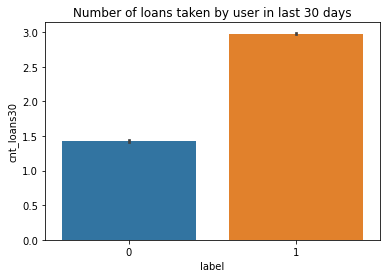

In [61]:
sns.barplot(x=df['label'],y=df['cnt_loans30'])
plt.title('Number of loans taken by user in last 30 days')

OBSERVATION:

1)Defaulters has taken between 1 to 1.5 no.of loans.
As practically there will be no 1.5 loan,considering only 1 loan.

2)Those who repaid had taken maxof 3 loans.

Text(0.5, 1.0, 'Total amount of loans taken by user in last 30 days')

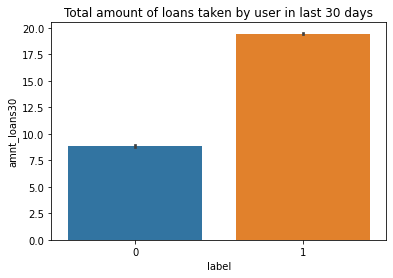

In [62]:
sns.barplot(x=df['label'],y=df['amnt_loans30'])
plt.title('Total amount of loans taken by user in last 30 days')

OBSERVATION:

1)Total Amount of loans took by Defaulters varies between 7.5 and 10.

2)Repayers has took 20 loans which tends to be the max limit.

Text(0.5, 1.0, 'Maximum Amount of loan taken by user in last 30 days')

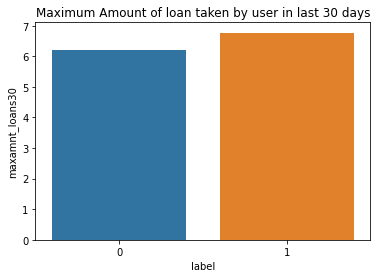

In [63]:
sns.barplot(x=df['label'],y=df['maxamnt_loans30'])
plt.title('Maximum Amount of loan taken by user in last 30 days')

OBSERVATION:

A user can take Maximum  of 7 loans in 30 days.

Defaulters took 6 loans whereas repayers took 7 loans. 

Can say that there not a much difference in loans took by both defaulters and repayers.

Text(0.5, 1.0, 'Median of loan amount took by user in last 30 days')

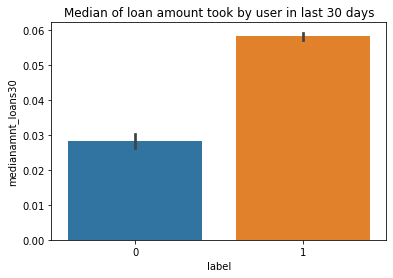

In [64]:
sns.barplot(x=df['label'],y=df['medianamnt_loans30'])
plt.title('Median of loan amount took by user in last 30 days')

OBSERVATION:

Median of loan Amount by defaulters is 0.03 where as repayers took max of median amount which is 0.06

Text(0.5, 1.0, 'Average payback time in days over last 30 days')

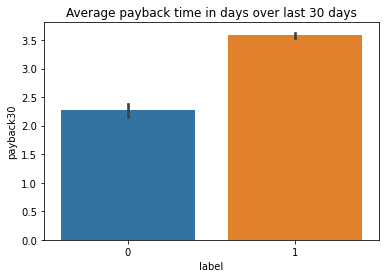

In [65]:
sns.barplot(x=df['label'],y=df['payback30'])
plt.title('Average payback time in days over last 30 days')

OBSERVATION:

A potentail defaulter might repay in 2 days.

Repayers took average of 3.5 days.

# 90 DAYS DATA

Text(0.5, 1.0, 'Daily amount spent from main account, averaged over last 90 days ')

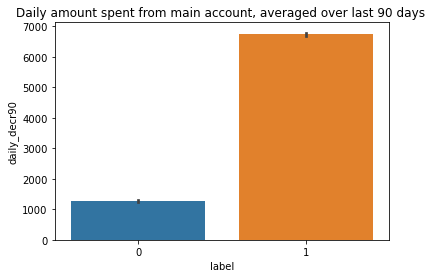

In [66]:
sns.barplot(x=df['label'],y=df['daily_decr90'])
plt.title('Daily amount spent from main account, averaged over last 90 days ')

OBSERVATION: In terms of daily spending from main account in span of 90 days,

1)the defaulters has spent a little above 1000

2)Repayers has spent 7000 rupaiah.

Text(0.5, 1.0, 'Average main account balance over last 90 days')

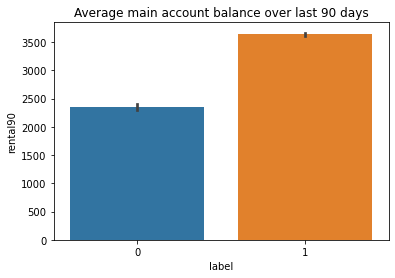

In [67]:
sns.barplot(x=df['label'],y=df['rental90'])
plt.title('Average main account balance over last 90 days')

OBSERVATION: In terms of Average balance over 90 days,

1)Defaullters average=2000 to 2500

2)Repayers average= 3500

Text(0.5, 1.0, 'Number of times main account got recharged in last 90 days')

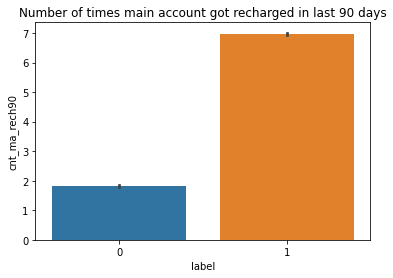

In [68]:
sns.barplot(x=df['label'],y=df['cnt_ma_rech90'])
plt.title('Number of times main account got recharged in last 90 days')

OBSERVATION:

In terms of No.of times Main accounts recharged in 90 days,

defaulters recharged for 2 times.

repayers recharged for 7 times.

Text(0.5, 1.0, 'Frequency of main account recharged in last 90 days')

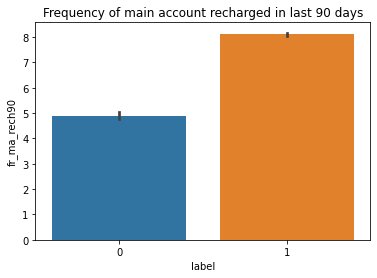

In [69]:
sns.barplot(x=df['label'],y=df['fr_ma_rech90'])
plt.title('Frequency of main account recharged in last 90 days')

OBSERVATION:

In terms of Frequency of Main Account recharge in 90 days period,

defaulters frequency is 5.

repayers frequency is 8.

Text(0.5, 1.0, 'Total amount of recharge in main account over last 90 days')

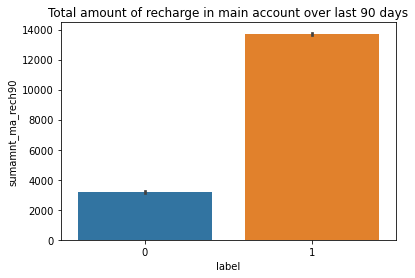

In [70]:
sns.barplot(x=df['label'],y=df['sumamnt_ma_rech90'])
plt.title('Total amount of recharge in main account over last 90 days')

OBSERVATION:

In terms of Total recharge amount in 90 days,

defaulters recharge amount varies from 2000 to 4000.
 Repayers recharged for 14000.

Text(0.5, 1.0, 'Median Amount of recharge done in main account over last 90 days')

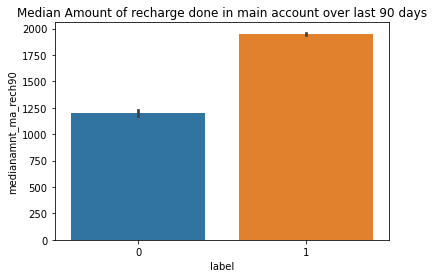

In [71]:
sns.barplot(x=df['label'],y=df['medianamnt_ma_rech90'])
plt.title('Median Amount of recharge done in main account over last 90 days')

OBSERVATION:

In terms of  Recharge amount median,

defaulters median-1250

repayers median -2000

Text(0.5, 1.0, 'Number of times data account got recharged in last 90 days')

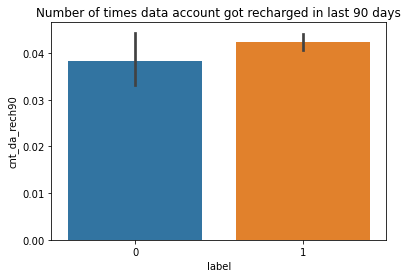

In [72]:
sns.barplot(x=df['label'],y=df['cnt_da_rech90'])
plt.title('Number of times data account got recharged in last 90 days')

OBSERVATION:

In terms of No.of times data account recharged,

both defaulters and repayers has approximately equal no.of recharges.

Text(0.5, 1.0, 'Frequency of data account recharged in last 90 days')

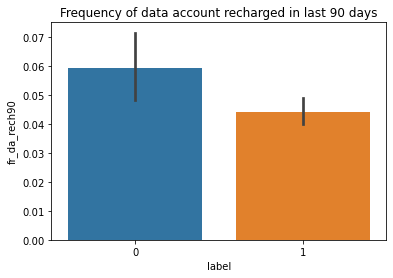

In [73]:
sns.barplot(x=df['label'],y=df['fr_da_rech90'])
plt.title('Frequency of data account recharged in last 90 days')

OBSERVATION:

With increase in frequency of Data account recharge in 90 days,defaulting rate is high.

Text(0.5, 1.0, 'Number of loans taken by user in last 90 days')

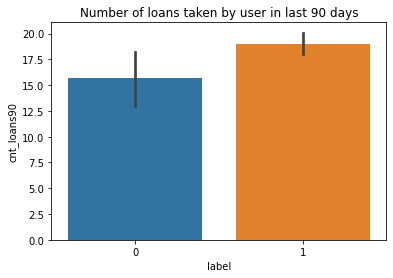

In [74]:
sns.barplot(x=df['label'],y=df['cnt_loans90'])
plt.title('Number of loans taken by user in last 90 days')

OBSERVATION:

1)Defaulters took max of 15 loans

2)Repayers took max of 20 loans.

Text(0.5, 1.0, 'Total amount of loans taken by user in last 90 days')

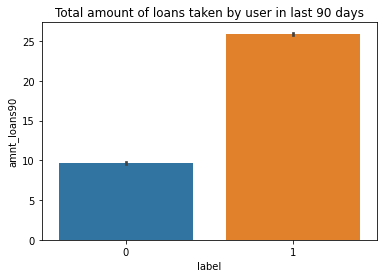

In [75]:
sns.barplot(x=df['label'],y=df['amnt_loans90'])
plt.title('Total amount of loans taken by user in last 90 days')

OBSERVATION:

In total amount of loans users took,

1)defaulters took max of 10 loans.

2)Repayers took 25 max of loans.

Text(0.5, 1.0, 'maximum amount of loan taken by user in 90 days')

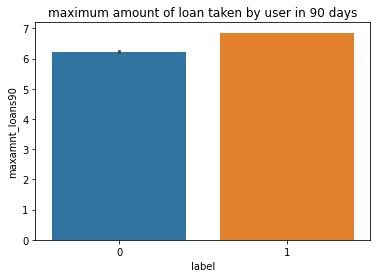

In [76]:
sns.barplot(x=df['label'],y=df['maxamnt_loans90'])
plt.title('maximum amount of loan taken by user in 90 days')

OBSERVATION:

In terms of maximum loan amount,both defaulters and repayers max limit is approximately same.

Text(0.5, 1.0, 'Median of loan amount  took by the user in last 90 days')

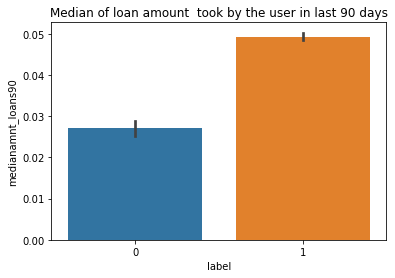

In [77]:
sns.barplot(x=df['label'],y=df['medianamnt_loans90'])
plt.title('Median of loan amount  took by the user in last 90 days')

OBSERVATION:

1)Defaulters took max. median of 0.03 loan amount

2)Repayers took max. median of 0.05 loan amount

Text(0.5, 1.0, 'Average payback time in days over last 90 days')

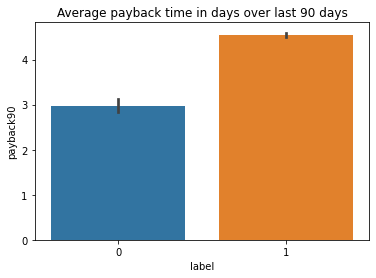

In [78]:
sns.barplot(x=df['label'],y=df['payback90'])
plt.title('Average payback time in days over last 90 days')

OBSERVATION:

Average pay back time of potential defaulter in 90 days is 3 days.

Average pay back time of repayer in 90 days is greater than 4 days.

<AxesSubplot:xlabel='label', ylabel='Month'>

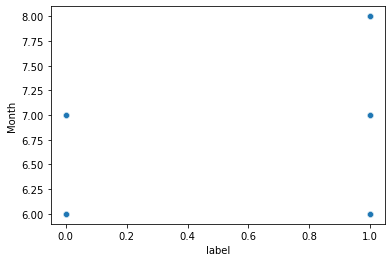

In [79]:
sns.scatterplot(x=df['label'],y=df['Month'])

# CHECKING FOR OUTLIERS:

<AxesSubplot:xlabel='amnt_loans30'>

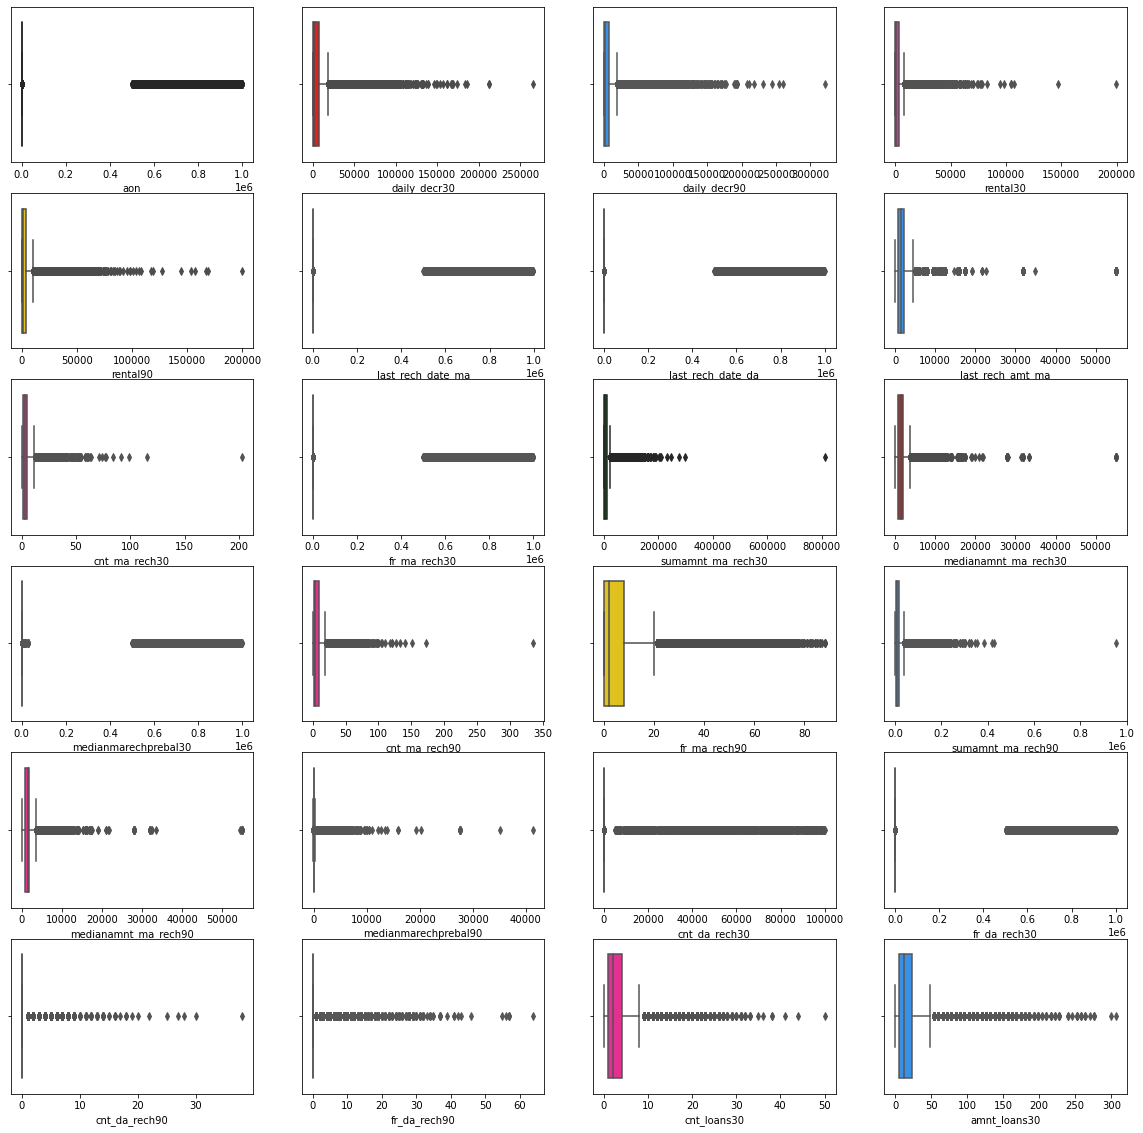

In [80]:
#checking outliers in columns
fig, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7, ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20),(ax21,ax22,ax23,ax24)) = plt.subplots(nrows=6, ncols=4, figsize = (20, 20))


sns.boxplot(df['aon'] , color="g",ax=ax1)
sns.boxplot(df['daily_decr30'] , color="r",ax=ax2)
sns.boxplot(df['daily_decr90'] , color="dodgerblue",ax=ax3)
sns.boxplot(df['rental30'] , color="deeppink",ax=ax4)
sns.boxplot(df['rental90'] , color="gold",ax=ax5)
sns.boxplot(df['last_rech_date_ma'] , color="dodgerblue",ax=ax6)
sns.boxplot(df['last_rech_date_da'] , color="deeppink",ax=ax7)
sns.boxplot(df['last_rech_amt_ma'] , color="dodgerblue",ax=ax8)
sns.boxplot(df['cnt_ma_rech30'] , color="deeppink",ax=ax9)
sns.boxplot(df['fr_ma_rech30'] , color="dodgerblue",ax=ax10)
sns.boxplot(df['sumamnt_ma_rech30'] , color="g",ax=ax11)
sns.boxplot(df['medianamnt_ma_rech30'] , color="r",ax=ax12)
sns.boxplot(df['medianmarechprebal30'] , color="dodgerblue",ax=ax13)
sns.boxplot(df['cnt_ma_rech90'] , color="deeppink",ax=ax14)
sns.boxplot(df['fr_ma_rech90'] , color="gold",ax=ax15)
sns.boxplot(df['sumamnt_ma_rech90'] , color="dodgerblue",ax=ax16)
sns.boxplot(df['medianamnt_ma_rech90'] , color="deeppink",ax=ax17)
sns.boxplot(df['medianmarechprebal90'] , color="dodgerblue",ax=ax18)
sns.boxplot(df['cnt_da_rech30'] , color="deeppink",ax=ax19)
sns.boxplot(df['fr_da_rech30'] , color="dodgerblue",ax=ax20)
sns.boxplot(df['cnt_da_rech90'] , color="deeppink",ax=ax21)
sns.boxplot(df['fr_da_rech90'] , color="dodgerblue",ax=ax22)
sns.boxplot(df['cnt_loans30'] , color="deeppink",ax=ax23)
sns.boxplot(df['amnt_loans30'] , color="dodgerblue",ax=ax24)

<AxesSubplot:xlabel='Date'>

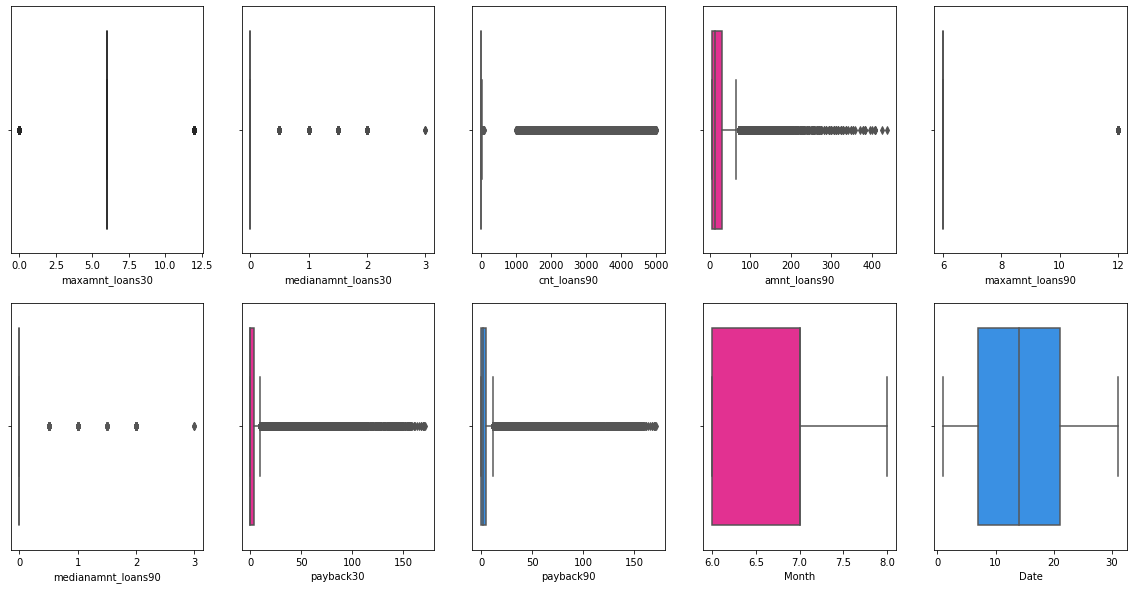

In [81]:
fig, ((ax1, ax2,ax3,ax4,ax5),(ax6,ax7, ax8,ax9,ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (20, 10))


sns.boxplot(df['maxamnt_loans30'] , color="g",ax=ax1)
sns.boxplot(df['medianamnt_loans30'] , color="r",ax=ax2)
sns.boxplot(df['cnt_loans90'] , color="dodgerblue",ax=ax3)
sns.boxplot(df['amnt_loans90'] , color="deeppink",ax=ax4)
sns.boxplot(df['maxamnt_loans90'] , color="gold",ax=ax5)
sns.boxplot(df['medianamnt_loans90'] , color="dodgerblue",ax=ax6)
sns.boxplot(df['payback30'] , color="deeppink",ax=ax7)
sns.boxplot(df['payback90'] , color="dodgerblue",ax=ax8)
sns.boxplot(df['Month'] , color="deeppink",ax=ax9)
sns.boxplot(df['Date'] , color="dodgerblue",ax=ax10)

OBSERVATION:

We can note that except Month and date column, outliers are present in almost every column.

# EDA CONCLUSION:

1) We can note that there is less data about defaulters and more about those who did repay their loan. Hence can say that the data is imbalanced.

2) With increase in Age on Network, defaulting rate is higher.

The data is collected based on different parameters for two time periods. One observation is for 30 days and other is for 90 days. Analyzing the parameters separately.

For 30 days:

Average main account balance over last 30 days: There is huge imbalance in the data collected,when compared to the imbalances, we can note that there is less difference between loan default and repayment. Hence can say that with the increase in Average Main balance,there is a probability of defaulting.

No.of times main account got recharged in last 30 days: Defaulters recharged Main account max number between 1 and 2 times.whereas repayers recharged for 4 plus times.

Frequency of main account recharged in last 30 days: With increase in frequency of Recharge in last 30 days, equal probabilities of defaulting and repayment. Even though there is less data about defaulting, there is high chance of defaulting with increased recharge frequency.

Total amount of recharge in main account over last 30 days: The defaulters has max limit ranging between 2000 and 3000 of Total recharge amount.

Median of recharge done in main account over last 30 days: On an average the defaulters has recharged for a max of 1000 indonesian rupaiah.

Median of Main balance before recharge in last 30 days: Defaulters has a Main account recharge median amount ranging between 4000 and 5000. With increase in Median of Main balance recharge, probability of defaulting is very high.

No.of times data account got recharged: Defaulters has recharged the data account for a maximum of 200 to 250 times. With increase in No.of times data accounts recharge, probability of defaulting is high.

Frequency of data account recharged: with increase in frequency of recharging data account, higher chances of defaulting.

Number of loans taken by user: 1) Defaulters has taken between 1 to 1.5 no.of loans. As practically there will be no 1.5 loan, considering only 1 loan. 2) Those who repaid had taken max of 3 loans.

Total amount of loans taken by user: 1)Total Amount of loans took by Defaulters varies between 7.5 and 10
2)Repayers has took 20 loans which tends to be the max limit.

Maximum Amount of loan taken by user: A user can take Maximum of 7 loans in 30 days.Defaulters took 6 loans whereas repayers took 7 loans. Can say that there not a much difference in loans took by both defaulters and repayers.

Median of loan amount took by user: Median of loan Amount by defaulters is 0.03 where as repayers took max of median amount which is 0.06

Average payback time in days over last 30 days: A potentail defaulter might repay in 2 days. Repayers took average of 3.5 days.

BASED ON 90 DAYS:

Daily amount spent from main account: In terms of daily spending from main account in span of 90 days, 1)the defaulters has spent a little above 1000 2)Repayers has spent 7000 rupaiah.

Average main account balance: In terms of Average balance over 90 days, 1)Defaullters average=2000 to 2500 2)Repayers average= 3500

Number of times main account got recharged: In terms of No.of times Main accounts recharged in 90 days, defaulters recharged for 2 times. Re-payers recharged for 7 times.

Frequency of main account recharge: In terms of Frequency of Main Account recharge in 90 days period, defaulters frequency is 5, Re-payers frequency is 8.

Total amount of recharge in main account: In terms of Total recharge amount in 90 days ,defaulters recharge amount varies from 2000 to 4000. Repayers recharged for 14000. In terms of Recharge amount median,defaulters median-1250,repayers median -2000 In terms of No.of times data account recharged, both defaulters and repayers has approximately equal no.of recharges.

Frequency of data account recharge: With increase in frequency of Data account recharge in 90 days,defaulting rate is high.

Number of loans taken by user: 1)Defaulters took max of 15 loans 2)Repayers took max of 20 loans.

In total amount of loans users took, 1)defaulters took max of 10 loans. 2)Repayers took 25 max of loans.

In terms of maximum loan amount,both defaulters and repayers max limit is approximately same.

Median of loan amount took by the user: 1)Defaulters took max. median of 0.03 loan amount 2)Repayers took max. median of 0.05 loan amount

Average pay back time of potential defaulter in 90 days is 3 days. Average pay back time of repayer in 90 days is greater than 4 days.

In [49]:
for col in df.columns:
    print("Number of unique value in ",col,"==>",df[col].nunique())

Number of unique value in  label ==> 2
Number of unique value in  msisdn ==> 184235
Number of unique value in  aon ==> 4473
Number of unique value in  daily_decr30 ==> 146584
Number of unique value in  daily_decr90 ==> 157215
Number of unique value in  rental30 ==> 129042
Number of unique value in  rental90 ==> 137314
Number of unique value in  last_rech_date_ma ==> 1143
Number of unique value in  last_rech_date_da ==> 1155
Number of unique value in  last_rech_amt_ma ==> 69
Number of unique value in  cnt_ma_rech30 ==> 71
Number of unique value in  fr_ma_rech30 ==> 1069
Number of unique value in  sumamnt_ma_rech30 ==> 15112
Number of unique value in  medianamnt_ma_rech30 ==> 509
Number of unique value in  medianmarechprebal30 ==> 30205
Number of unique value in  cnt_ma_rech90 ==> 110
Number of unique value in  fr_ma_rech90 ==> 89
Number of unique value in  sumamnt_ma_rech90 ==> 31624
Number of unique value in  medianamnt_ma_rech90 ==> 607
Number of unique value in  medianmarechprebal90 

# PLOTTING CORRELATIONS

In [50]:
#msisdn is nothing but phone number of the user,it has nothing to do with the predictions of loan payment
#so dropping the msisdn column
df.drop(['msisdn'],axis=1,inplace=True)

In [51]:
df_Cor=df.corr()
df_Cor['label']

label                   1.000000
aon                    -0.003900
daily_decr30            0.168267
daily_decr90            0.166020
rental30                0.057860
rental90                0.075098
last_rech_date_ma       0.003676
last_rech_date_da       0.001772
last_rech_amt_ma        0.131744
cnt_ma_rech30           0.239399
fr_ma_rech30            0.001274
sumamnt_ma_rech30       0.204252
medianamnt_ma_rech30    0.142047
medianmarechprebal30   -0.004820
cnt_ma_rech90           0.237831
fr_ma_rech90            0.084565
sumamnt_ma_rech90       0.206712
medianamnt_ma_rech90    0.120616
medianmarechprebal90    0.040006
cnt_da_rech30           0.003832
fr_da_rech30           -0.000075
cnt_da_rech90           0.003253
fr_da_rech90           -0.005243
cnt_loans30             0.201600
amnt_loans30            0.202318
maxamnt_loans30         0.087468
medianamnt_loans30      0.045556
cnt_loans90             0.004902
amnt_loans90            0.204055
maxamnt_loans90         0.101247
medianamnt

<AxesSubplot:>

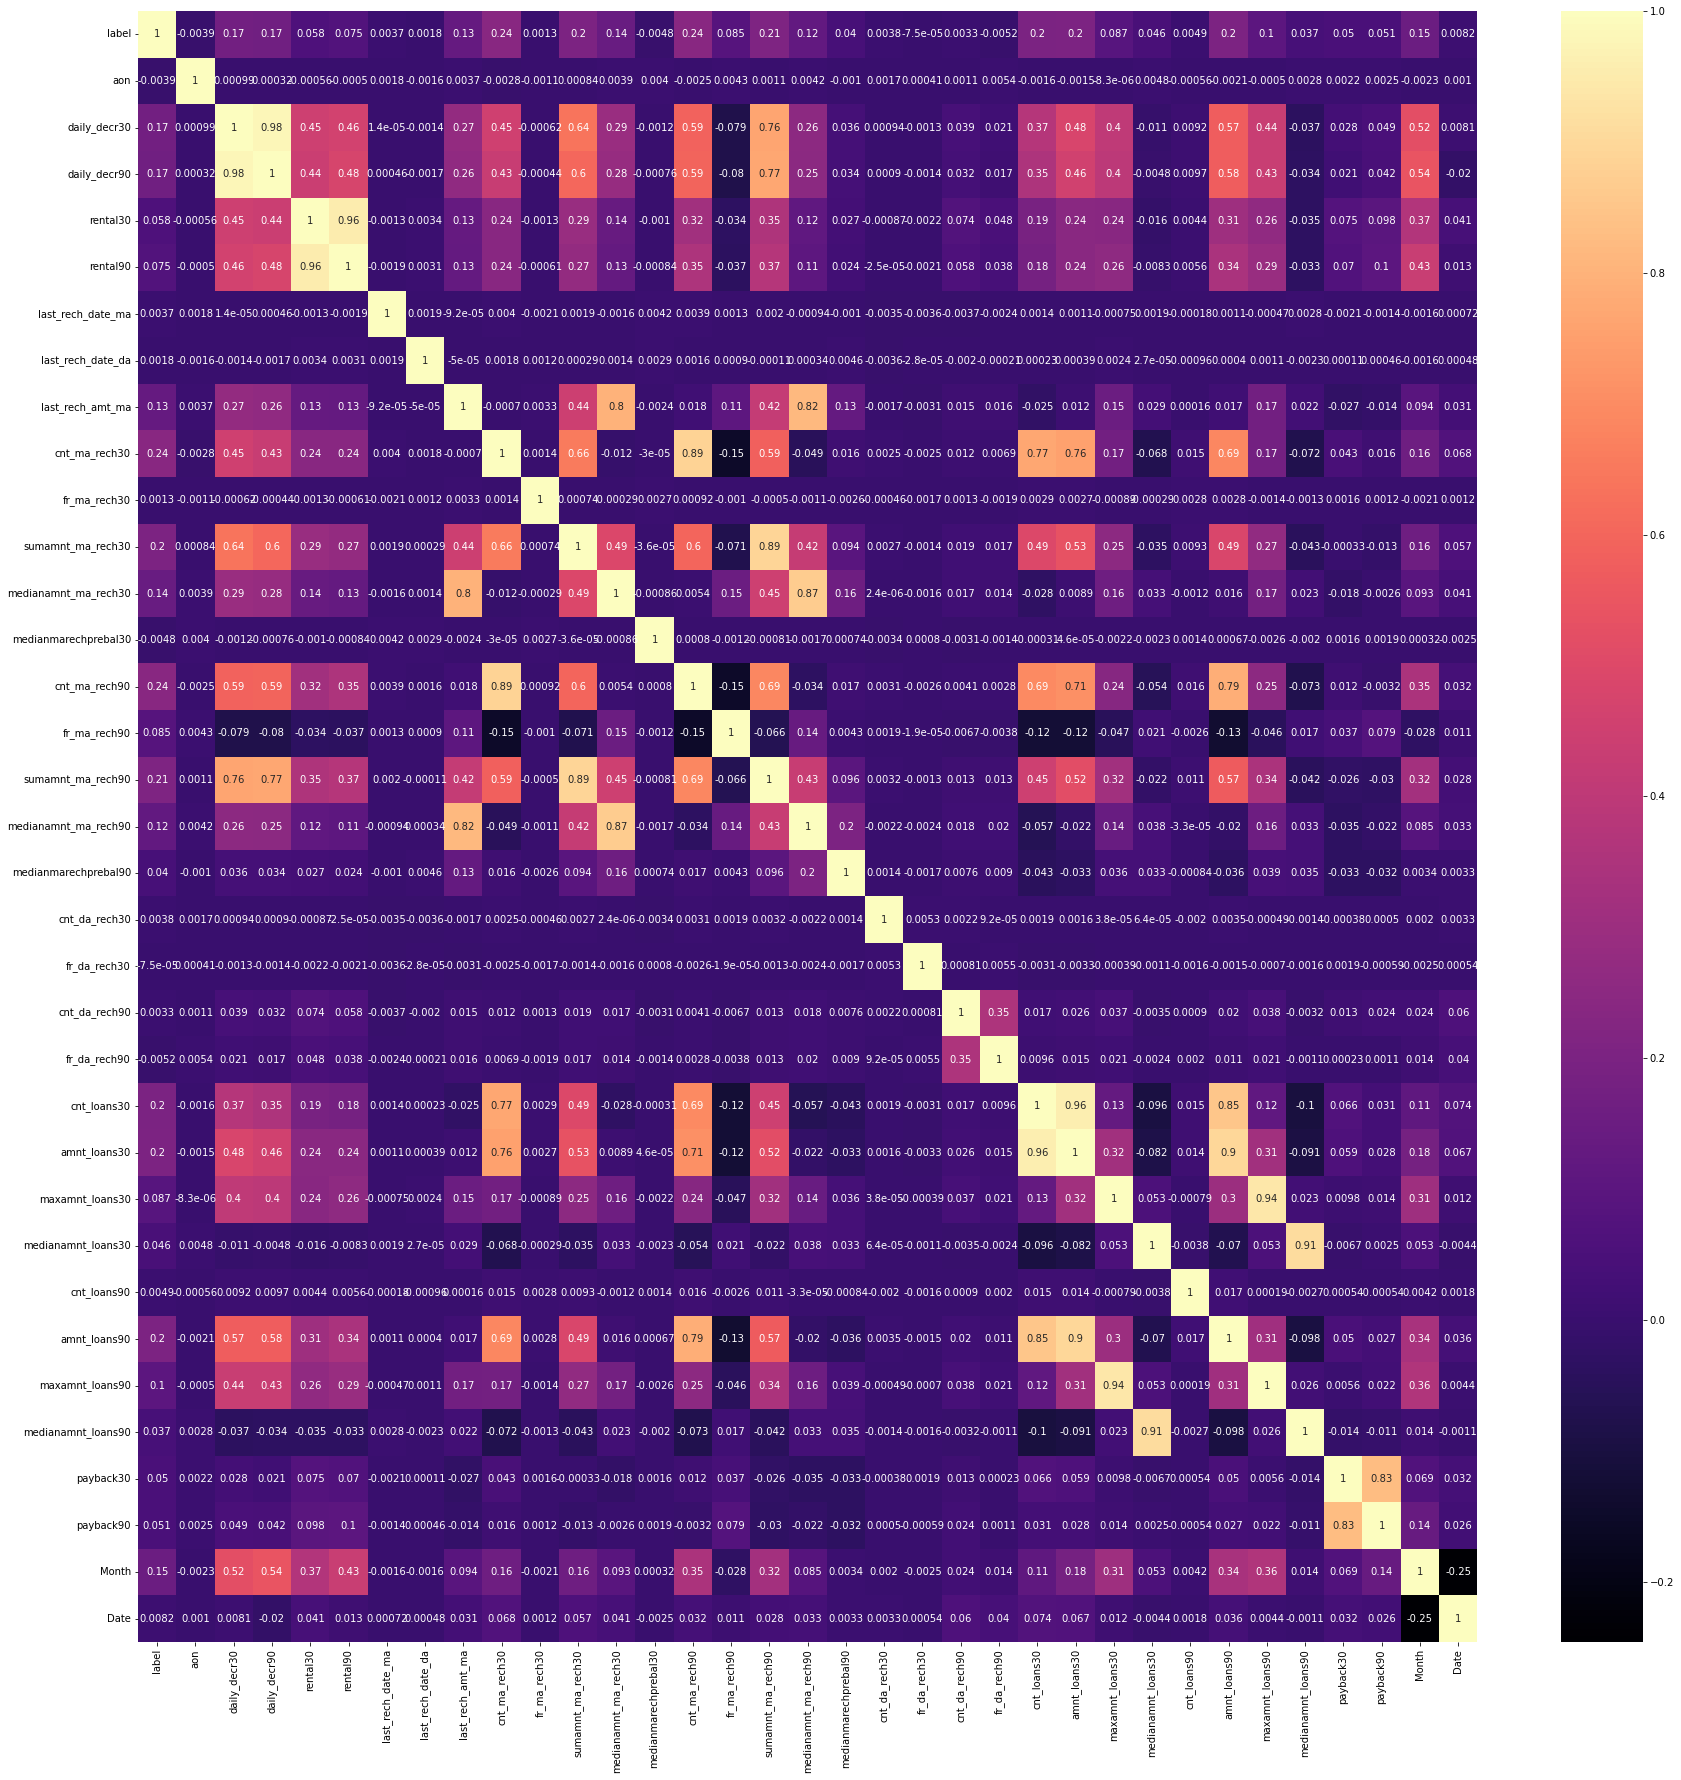

In [85]:
plt.figure(figsize=(30,30))
sns.heatmap(df_Cor,cmap='magma',annot=True)

# OUTLIER REMOVAL:

In [52]:
from scipy.stats import zscore

z=np.abs(zscore(df))
print(np.where(z>3))

(array([    21,     22,     22, ..., 207543, 207544, 207544], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [53]:
df1=df[(z<3).all(axis=1)]
print("With outliers==>",df.shape)
print("After removing outliers==>",df1.shape)

With outliers==> (207550, 35)
After removing outliers==> (160365, 35)


OBSERVATION:

22% of data removed through z score.

# IQR METHOD:

In [54]:
from scipy import stats
IQR=stats.iqr(df)
IQR

117.44

In [55]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

In [56]:
df_out=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df_out.shape)

(31988, 35)


OBSERVATION:

Huge amounts of data is removed through IQR ,hence can say IQR is not recommended for outlier removal

# NOTE:

As it has been mentioned that data removed from outlier treatment should not exceed 7 to 8%,

Zscore causes 22% data loss and IQR causes 84.5% data loss.

Another technique is replacing the outlier data with mean or median.But when we obserfve this data set there is a huge difference between minimum and maximum values.If we calculate mean or median it wont give appropriate values as it includes the outlier value(maximum ones).So not using this approach.

As we are not dropping the outliers, another approach is capping or winsorization of outliers.

using percentile capping. Values that are less than the value at 10th percentile are replaced by 10th percentile value , and values greater than 90th percentile are replaced by 90th percentile value.

In [57]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Month', 'Date'],
      dtype='object')

In [58]:
cols=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in cols:
            FloorQ=df[i].quantile(0.10)
            CeilQ=df[i].quantile(0.90)
            df[i] = np.where(df[i] <FloorQ,FloorQ,df[i])
            df[i] = np.where(df[i] >CeilQ,CeilQ,df[i])
            print(i,"->",df[i].skew())

aon -> 0.5284793206435929
daily_decr30 -> 1.0935453721579609
daily_decr90 -> 1.1543224310681035
rental30 -> 1.1265741276622285
rental90 -> 1.1558700165194147
last_rech_date_ma -> 1.1987272241492852
last_rech_date_da -> 0
last_rech_amt_ma -> 0.8359061321231329
cnt_ma_rech30 -> 0.6277453849914029
fr_ma_rech30 -> 1.0070623988221368
sumamnt_ma_rech30 -> 0.7588124242088926
medianamnt_ma_rech30 -> 0.9295986608192282
medianmarechprebal30 -> 1.3584623130969407
cnt_ma_rech90 -> 0.7670588467394291
fr_ma_rech90 -> 1.5893409860791652
sumamnt_ma_rech90 -> 0.8543081510966238
medianamnt_ma_rech90 -> 0.9684104269012621
medianmarechprebal90 -> 1.258477107838736
cnt_da_rech30 -> 0
fr_da_rech30 -> 0
cnt_da_rech90 -> 0
fr_da_rech90 -> 0
cnt_loans30 -> 0.8910588387118499
amnt_loans30 -> 0.7816448336192705
maxamnt_loans30 -> 2.2568424305116785
medianamnt_loans30 -> 0
cnt_loans90 -> 1.017641178749645
amnt_loans90 -> 0.9564054554835316
maxamnt_loans90 -> 2.224470801656892
medianamnt_loans90 -> 0
payback30 -> 

In [59]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
count,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.0,207550.000000,207550.000000,...,207550.000000,207550.0,207550.000000,207550.000000,207550.000000,207550.0,207550.000000,207550.000000,207550.000000,207550.000000
mean,0.873948,637.677639,4224.630321,4664.158439,2148.837527,2720.963114,5.044625,0.0,1660.528861,3.537909,...,6.754777,0.0,3.331279,20.643180,6.769116,0.0,2.199570,2.804969,6.787560,14.429159
std,0.331908,433.902329,5369.966356,6076.149249,2379.411441,3081.028838,4.925487,0.0,1231.349189,2.876785,...,1.989722,0.0,2.672582,16.275252,2.005785,0.0,2.768133,3.382969,0.737225,8.421331
min,0.000000,132.000000,8.674800,8.783167,66.929000,74.300000,1.000000,0.0,0.000000,0.000000,...,6.000000,0.0,1.000000,6.000000,6.000000,0.0,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,41.760000,41.979500,299.690000,326.340000,1.000000,0.0,770.000000,1.000000,...,6.000000,0.0,1.000000,6.000000,6.000000,0.0,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,3.000000,0.0,1539.000000,3.000000,...,6.000000,0.0,2.000000,12.000000,6.000000,0.0,0.000000,1.714286,7.000000,14.000000
75%,1.000000,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,7.000000,0.0,2309.000000,5.000000,...,6.000000,0.0,5.000000,30.000000,6.000000,0.0,3.800000,4.500000,7.000000,21.000000
max,1.000000,1410.000000,15564.200000,17720.215000,7277.106000,9422.277000,16.000000,0.0,4067.000000,9.000000,...,12.000000,0.0,9.000000,54.000000,12.000000,0.0,8.000000,10.000000,8.000000,31.000000


OBSERVATION:

We can notice that there is difference in the max values of almost all columns after using the capping technique.

In [60]:
#seggregating data into X and Y
x=df.drop(['label'],axis=1)
y=df['label']

In [61]:
#scaling X vlues
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

In [62]:
x.shape

(207550, 34)

In [63]:
y.shape

(207550,)

In [64]:
#skewness removal
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

# Imbalanced learn

In [99]:
#!pip3 install imblearn --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --user

In [65]:
from imblearn.under_sampling import RandomUnderSampler

UnderSample=RandomUnderSampler(sampling_strategy='majority')
x_us,y_us=UnderSample.fit_resample(x,y)

print("Original target database shape:",y.shape)
print("Resample target database shape:",y_us.shape)

Original target database shape: (207550,)
Resample target database shape: (52324,)


In [66]:
from collections import Counter
print("Target distribution before sampling:",Counter(y))
print("\nTarget distribution after sampling:",Counter(y_us))

Target distribution before sampling: Counter({1: 181388, 0: 26162})

Target distribution after sampling: Counter({0: 26162, 1: 26162})


OBSERVATION:

We can note that before performing Random under sampling, the data is unevenly distributed.

there are 181388 records of repayers and 26162 record of defaulters.If we feed this data into the model, 
it may give biased prediction.

So,performed undersampling.After performing undersampling we can note that equal no.of records are fetched for both defauters and repayers.

# MODEL BUILDING:

In [67]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# SPLITTING X AND Y:

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x_us,y_us,test_size=0.33,random_state=42)

# USING UNDER SAMPLING::

# LOGISTIC REGRESSION

In [69]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_us,y_us,cv=5,scoring='accuracy')
print("Cross validation score for Logistic Regression:",np.mean(logreg_score))

Cross validation score for Logistic Regression: 0.7716151990543694


In [113]:
logreg.fit(x_train,y_train)
predicted_logreg=logreg.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predicted_logreg))
print("Precision:",precision_score(y_test,predicted_logreg))
print("Recall:",recall_score(y_test,predicted_logreg))
print("F-measure",f1_score(y_test,predicted_logreg))
print("Training accuracy==>",logreg.score(x_train,y_train))
print("Test accuracy==>",logreg.score(x_test,y_test))

Accuracy score: 0.7712978513928302
Precision: 0.7860453769212002
Recall: 0.745919666628082
F-measure 0.7654570291619647
Training accuracy==> 0.7734546595544399
Test accuracy==> 0.7712978513928302


# DECISION TREE CLASSIFIER:

In [119]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_us,y_us,cv=5,scoring='accuracy')
print("Cross validation score for DECISION TREE CLASSIFIER:",np.mean(dtc_score))

Cross validation score for dtc: 0.7776355435549691


In [115]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predicted_dtc))
print("Precision:",precision_score(y_test,predicted_dtc))
print("Recall:",recall_score(y_test,predicted_dtc))
print("F-measure",f1_score(y_test,predicted_dtc))
print("Training accuracy==>",dtc.score(x_train,y_train))
print("Test accuracy==>",dtc.score(x_test,y_test))

Accuracy score: 0.7780158684195286
Precision: 0.779874213836478
Recall: 0.7750897094571131
F-measure 0.7774746008708272
Training accuracy==> 0.9984026014775936
Test accuracy==> 0.7780158684195286


# KNeighborsClassifier:

In [116]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for K-Neighbors Classifier:",np.mean(knn_score))

cross validation score for knn: 0.7809990944768568


In [117]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predicted_knn))
print("Precision:",precision_score(y_test,predicted_knn))
print("Recall:",recall_score(y_test,predicted_knn))
print("F-measure",f1_score(y_test,predicted_knn))
print("Training accuracy==>",knn.score(x_train,y_train))
print("Test accuracy==>",knn.score(x_test,y_test))

Accuracy score: 0.7801586841952858
Precision: 0.7982510161349919
Recall: 0.7502025697418683
F-measure 0.7734813223535028
Training accuracy==> 0.8413440967567105
Test accuracy==> 0.7801586841952858


# RandomForestClassifier:

In [147]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_us,y_us,cv=5,scoring='accuracy')
print("Cross validation score for Random Forest Classifier:",np.mean(rfc_score))

Cross validation score for Random Forest Classifier: 0.8378755199726481


In [122]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predicted_rfc))
print("Precision:",precision_score(y_test,predicted_rfc))
print("Recall:",recall_score(y_test,predicted_rfc))
print("F-measure",f1_score(y_test,predicted_rfc))
print("Training accuracy==>",rfc.score(x_train,y_train))
print("Test accuracy==>",knn.score(x_test,y_test))

Accuracy score: 0.8391150749985522
Precision: 0.8366456059735784
Recall: 0.843037388586642
F-measure 0.8398293357933578
Training accuracy==> 0.9983740765039792
Test accuracy==> 0.7801586841952858


# ENSEMBLE TECHNIQUES:

# 1.ADA BOOST CLASSIFIER

In [123]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_us,y_us,cv=10,scoring='accuracy')
print("Cross validation score for Ada boost:",np.mean(adb_score))

Cross validation score for Ada boost: 0.8132979383949541


In [125]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predicted_adb))
print("Precision:",precision_score(y_test,predicted_adb))
print("Recall:",recall_score(y_test,predicted_adb))
print("F-measure",f1_score(y_test,predicted_adb))
print("Training accuracy==>",adb.score(x_train,y_train))
print("Test accuracy==>",adb.score(x_test,y_test))

Accuracy score: 0.8120692650721029
Precision: 0.8264342774146696
Recall: 0.7903692557008913
F-measure 0.8079995266552276
Training accuracy==> 0.8141883218758023
Test accuracy==> 0.8120692650721029


# 2.BAGGING CLASSIFIER

In [126]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_us,y_us,cv=10,scoring='accuracy')
print("Cross validation score for BAGGING Classifier:",np.mean(bgc_score))

Cross validation score for BAGGING Classifier: 0.8276700153577246


In [128]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predicted_bgc))
print("Precision:",precision_score(y_test,predicted_bgc))
print("Recall:",recall_score(y_test,predicted_bgc))
print("F-measure:",f1_score(y_test,predicted_bgc))
print("Training accuracy==>",bgc.score(x_train,y_train))
print("Test accuracy==>",bgc.score(x_test,y_test))

Accuracy score: 0.8241153645682516
Precision: 0.8493389872786231
Recall: 0.7882856812131034
F-measure: 0.8176742510656181
Training accuracy==> 0.9871922868471347
Test accuracy==> 0.8241153645682516


# 3.Gradient Boosting classifier

In [130]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_us,y_us,cv=10,scoring='accuracy')
print("Cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

Cross validation score for Gradient Boosting Classifier: 0.8400159998211774


In [131]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predicted_grbc))
print("Precision:",precision_score(y_test,predicted_grbc))
print("Recall:",recall_score(y_test,predicted_grbc))
print("F-measure:",f1_score(y_test,predicted_grbc))
print("Training accuracy==>",grbc.score(x_train,y_train))
print("Test accuracy==>",grbc.score(x_test,y_test))

Accuracy score: 0.8396363004575201
Precision: 0.8513287048120661
Recall: 0.8232434309526565
F-measure: 0.8370505502265639
Training accuracy==> 0.8441965941181504
Test accuracy==> 0.8396363004575201


OBSERVATION:

Choosing Adaboost classifier because there both train and test accuracies are same.
Rest of the two models there is huge difference between train and test accuracies so not considering them.

# HYPER PARAMETER TUNING:

In [132]:
parameters={'n_estimators':[100,200],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5],
    'algorithm':['SAMME', 'SAMME.R']}

In [133]:
adb_grid=GridSearchCV(AdaBoostClassifier(),parameters,cv=10,scoring='accuracy')

In [134]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning==>",accuracy_score(y_test,adb_pred))

Accuracy after parameter tuning==> 0.8182081426999479


Accuracy after parameter tuning:: 0.8186135402791452
OBSERVATION:

We can observe that accuracy score increased after tuning hyper Parameters

In [137]:
print("*******************CLASSIFICATION REORT****************\n",classification_report(y_test,adb_pred))

*******************CLASSIFICATION REORT****************
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      8628
           1       0.83      0.80      0.82      8639

    accuracy                           0.82     17267
   macro avg       0.82      0.82      0.82     17267
weighted avg       0.82      0.82      0.82     17267



<AxesSubplot:>

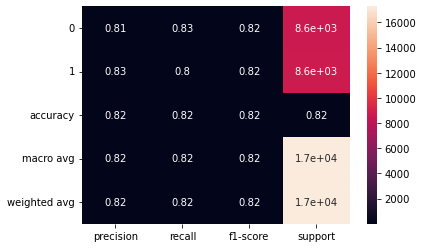

In [139]:
clsf_repo=classification_report(y_test,adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T,annot=True)

In [140]:
from sklearn.metrics import roc_auc_score

print("roc auc score==>",roc_auc_score(y_test,adb_pred))

roc auc score==> 0.8182179934843891


In [143]:
from sklearn.metrics import roc_curve

fpr1,tpr1,thresh1=roc_curve(y_test,adb_pred,pos_label=1)
fpr2,tpr2,thresh2=roc_curve(y_test,predicted_dtc,pos_label=1)
fpr3,tpr3,thresh3=roc_curve(y_test,predicted_rfc,pos_label=1)
fpr4,tpr4,thresh4=roc_curve(y_test,predicted_knn,pos_label=1)

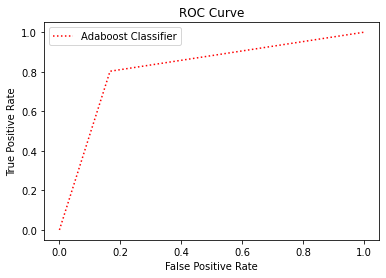

In [145]:
#plotting ROC CURVE

plt.plot(fpr1,tpr1,linestyle=':',color='red',label="Adaboost Classifier")

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

# SAVING MODEL:

In [146]:
import joblib

joblib.dump(adb_grid.best_estimator_,'MicroCreditDefaulterPrediction.obj')

['MicroCreditDefaulterPrediction.obj']